import numpy as np
import pandas as pd
from bs4 import BeautifulSCoup

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
import requests

In [3]:
webpage = requests.get('https://in.investing.com/commodities/crude-oil-historical-data?end_date=1656527400&st_date=959711400',headers={'User-Agent': 'Custom'}).text

In [4]:
webpage

'\n<!DOCTYPE html>\n<html lang="en-in" class="Other">\n<head>\n<title>Crude Oil WTI Futures Historical Prices - Investing.com India</title>\n<meta name="description" content="Crude Oil WTI Futures historical prices: closing price, open, high, low, change and %change of the %NAME_TRANS% for the selected range of dates." />\n<meta name="charset" content="utf-8" />\n<meta name="spaceShips" content="sdhgsg" />\n<meta http-equiv="x-ua-compatible" content="ie=edge" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1" />\n<meta name="twitter:card" content="summary" />\n<meta name="twitter:site" content="@investing_ind" />\n<meta name="twitter:title" content="Crude Oil WTI Futures Historical Prices - Investing.com India" />\n<meta name="twitter:description" content="Crude Oil WTI Futures historical prices: closing price, open, high, low, change and %change of the %NAME_TRANS% for the selected range of dates." />\n<meta name="twitter:image" content="https://i

In [5]:
soup = BeautifulSoup(webpage,'lxml')

In [6]:
print(soup.prettify())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
date_soup = soup.find_all('td',class_ = 'col-rowDate')

In [8]:
date = []

for i in date_soup:
  date.append(i.find('span').text)


In [9]:
date[4999]

'May 31, 2000'

In [10]:
price_soup = soup.find_all('td',class_="col-last_close")

In [11]:
price_soup

[<td class="col-last_close u-txt-align-end u-down u-txt-align-end ">
 <span class="text">59.56</span>
 </td>, <td class="col-last_close u-txt-align-end u-down u-txt-align-end ">
 <span class="text">59.61</span>
 </td>, <td class="col-last_close u-txt-align-end u-down u-txt-align-end ">
 <span class="text">62.70</span>
 </td>, <td class="col-last_close u-txt-align-end u-up u-txt-align-end ">
 <span class="text">63.27</span>
 </td>, <td class="col-last_close u-txt-align-end u-up u-txt-align-end ">
 <span class="text">63.05</span>
 </td>, <td class="col-last_close u-txt-align-end u-down u-txt-align-end ">
 <span class="text">61.18</span>
 </td>, <td class="col-last_close u-txt-align-end u-up u-txt-align-end ">
 <span class="text">61.33</span>
 </td>, <td class="col-last_close u-txt-align-end u-down u-txt-align-end ">
 <span class="text">61.06</span>
 </td>, <td class="col-last_close u-txt-align-end u-down u-txt-align-end ">
 <span class="text">61.68</span>
 </td>, <td class="col-last_clos

In [12]:
price = []

for i in price_soup:
  price.append(i.find('span').text)

In [13]:
len(price)

5000

In [14]:
open_soup = soup.find_all('td',class_ = 'col-last_open')

In [15]:
open = []
for i in open_soup:
  open.append(i.find('span').text)

In [16]:
len(open)

5000

In [17]:
high_soup = soup.find_all('td',class_ = 'col-last_max')

In [18]:
high = []
for i in high_soup:
  high.append(i.find('span').text)

len(high)

5000

In [19]:
low_soup = soup.find_all('td',class_ = 'col-last_min')

In [20]:
low = []
for i in low_soup:
  low.append(i.find('span').text)
len(low)

5000

In [21]:
vol_soup = soup.find_all('td',class_ = 'col-volume')

In [22]:
volume = []
for i in vol_soup:
  volume.append(i.find('span').text)
len(volume)

5006

In [23]:
volume = volume[:5000]

In [24]:
volume[4999]

'89.82K'

In [25]:
chg_soup = soup.find_all('td',class_="col-change_percent")

In [26]:
change_per = []
for i in chg_soup:
  change_per.append(i.find('span').text)
len(change_per)

5000

In [27]:
d = {'Date': date, 'Price': price, 'Open': open, 'High': high, 'Low': low, 'Volume': volume, 'Che%': change_per}
df = pd.DataFrame(d)

In [28]:
df.head()

Date  Price   Open   High    Low   Volume    Che%
0  Jan 09, 2020  59.56  59.99  60.31  58.66  750.93K  -0.08%
1  Jan 08, 2020  59.61  62.84  65.65  59.15    1.21M  -4.93%
2  Jan 07, 2020  62.70  62.91  63.15  62.11  582.65K  -0.90%
3  Jan 06, 2020  63.27  63.71  64.72  62.64  724.24K   0.35%
4  Jan 03, 2020  63.05  61.18  64.09  61.13  885.86K   3.06%

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5000 non-null   object
 1   Price   5000 non-null   object
 2   Open    5000 non-null   object
 3   High    5000 non-null   object
 4   Low     5000 non-null   object
 5   Volume  5000 non-null   object
 6   Che%    5000 non-null   object
dtypes: object(7)
memory usage: 273.6+ KB


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df.head()

Date  Price   Open   High    Low   Volume    Che%
0  Jan 09, 2020  59.56  59.99  60.31  58.66  750.93K  -0.08%
1  Jan 08, 2020  59.61  62.84  65.65  59.15    1.21M  -4.93%
2  Jan 07, 2020  62.70  62.91  63.15  62.11  582.65K  -0.90%
3  Jan 06, 2020  63.27  63.71  64.72  62.64  724.24K   0.35%
4  Jan 03, 2020  63.05  61.18  64.09  61.13  885.86K   3.06%

In [32]:
df = df.drop(df[df['Volume'] == '0'].index)


In [33]:
df.reset_index(drop=True, inplace=True)


In [34]:
df

Date  Price   Open   High    Low   Volume    Che%
0     Jan 09, 2020  59.56  59.99  60.31  58.66  750.93K  -0.08%
1     Jan 08, 2020  59.61  62.84  65.65  59.15    1.21M  -4.93%
2     Jan 07, 2020  62.70  62.91  63.15  62.11  582.65K  -0.90%
3     Jan 06, 2020  63.27  63.71  64.72  62.64  724.24K   0.35%
4     Jan 03, 2020  63.05  61.18  64.09  61.13  885.86K   3.06%
...            ...    ...    ...    ...    ...      ...     ...
4918  Jun 06, 2000  29.75  29.66  30.23  29.52   51.28K   0.17%
4919  Jun 05, 2000  29.70  30.32  30.75  29.47   64.81K  -2.14%
4920  Jun 02, 2000  30.35  30.14  30.65  29.78   59.86K   0.70%
4921  Jun 01, 2000  30.14  29.00  30.25  28.87   67.23K   3.90%
4922  May 31, 2000  29.01  30.15  30.77  28.95   89.82K  -4.42%

[4923 rows x 7 columns]

In [35]:
def convert(num):
  if num[-1] == 'K':
    num = num.replace('K','0')
    return int(float(num)*1000)
  elif num[-1] == 'M':
    num = num.replace('M','0000')
    return int(float(num)*1000000)

In [36]:
df['Volume'] = df['Volume'].apply(convert)

In [37]:
df = df.drop('Che%',axis=1)

In [38]:
df['Price'] = pd.to_numeric(df['Price'])
df['Open'] = pd.to_numeric(df['Open'])
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])
df['Volume'] = pd.to_numeric(df['Volume'])


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4923 non-null   object 
 1   Price   4923 non-null   float64
 2   Open    4923 non-null   float64
 3   High    4923 non-null   float64
 4   Low     4923 non-null   float64
 5   Volume  4923 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 230.9+ KB


In [40]:
df1 = df['Price']
df1.tail()

4918    29.75
4919    29.70
4920    30.35
4921    30.14
4922    29.01
Name: Price, dtype: float64

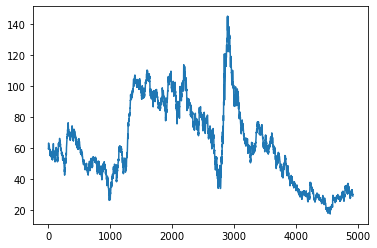

In [41]:
plt.plot(df1)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
df1 = scalar.fit_transform(np.array(df1).reshape(-1,1))

In [43]:
df1

array([[0.32939612],
       [0.32978723],
       [0.35395807],
       ...,
       [0.10090738],
       [0.09926471],
       [0.09042553]])

In [44]:
training_size = int(len(df1)*.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [45]:
len(train_data),len(test_data),df.shape

(3199, 1724, (4923, 6))

In [46]:
def get_data(dataset,timestep=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-timestep-1):
    a = dataset[i:(i + timestep), 0]
    dataX.append(a)
    dataY.append(dataset[i + timestep, 0])
  return np.array(dataX) , np.array(dataY)

In [47]:
timestep = 100
x_train , y_train = get_data(train_data,timestep)
x_test , y_test = get_data(test_data, timestep)

In [48]:
print(x_train.shape),print(y_train.shape)

(3098, 100)
(3098,)


(None, None)

In [49]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [54]:
from logging import error
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape= (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose = 1)

Epoch 1/100
49/49 [==============================] - 17s 223ms/step - loss: 0.0210 - val_loss: 0.0021
Epoch 2/100
49/49 [==============================] - 10s 202ms/step - loss: 0.0015 - val_loss: 5.6227e-04
Epoch 3/100
49/49 [==============================] - 9s 191ms/step - loss: 0.0012 - val_loss: 4.5544e-04
Epoch 4/100
49/49 [==============================] - 10s 195ms/step - loss: 0.0012 - val_loss: 3.6095e-04
Epoch 5/100
49/49 [==============================] - 11s 228ms/step - loss: 0.0011 - val_loss: 3.4804e-04
Epoch 6/100
49/49 [==============================] - 9s 190ms/step - loss: 9.8641e-04 - val_loss: 3.5388e-04
Epoch 7/100
49/49 [==============================] - 9s 194ms/step - loss: 9.7243e-04 - val_loss: 5.1787e-04
Epoch 8/100
49/49 [==============================] - 9s 194ms/step - loss: 9.0081e-04 - val_loss: 4.4842e-04
Epoch 9/100
49/49 [==============================] - 10s 195ms/step - loss: 8.6998e-04 - val_loss: 4.5726e-04
Epoch 10/100
49/49 [==================

In [57]:
train_predictiom = model.predict(x_train)
test_prediction = model.predict(x_test)

In [58]:
train_predictiom = scalar.inverse_transform(train_predictiom)
test_prediction = scalar.inverse_transform(test_prediction)

In [59]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predictiom))

76.5419525200288

In [60]:
math.sqrt(mean_squared_error(y_test, test_prediction))

42.39089226803645

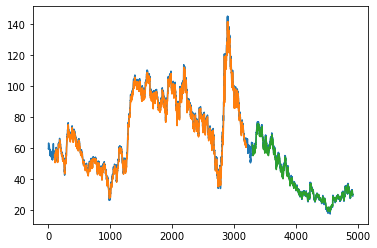

In [70]:
look_back=100
# shit train prediction by 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predictiom)+look_back, :] = train_predictiom
# shift test prediction by double  of look back
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predictiom)+(look_back*2)+1:len(df1)-1, :] = test_prediction
# plot evrything
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [71]:
len(test_data) 

1724

In [67]:
x_input = test_data[1624:].reshape(1,-1)
x_input.shape

(1, 100)

In [76]:
temp_input = list(x_input)[0].tolist()

In [77]:
len(temp_input)

100

In [79]:
lst_outputs = []
steps = 100
i=0
while(i<30):
  if (len(temp_input) > 100):
    x_input = np.array(temp_input[1:])
    x_input = x_input.reshape(1,steps,1)
    y_val = model.predict(x_input,verbose=0)
    temp_input.extend(y_val[0].tolist())
    temp_input = temp_input[1:]
    lst_outputs.extend(y_val.tolist())
    i= i+1


  else:
    x_input = x_input.reshape((1, steps, 1))
    y_val = model.predict(x_input, verbose =0)
    print(y_val[0])
    temp_input.extend(y_val[0].tolist())
    print(len(temp_input))
    lst_outputs.extend(y_val.tolist())
    i = i+1
print(lst_outputs)

[0.09676051]
101
[[0.09676051139831543], [0.09561234712600708], [0.0952715277671814], [0.09507612884044647], [0.09484036266803741], [0.09454779326915741], [0.09421758353710175], [0.09387125074863434], [0.09352728724479675], [0.09319992363452911], [0.09289853274822235], [0.0926276445388794], [0.09238757193088531], [0.09217549860477448], [0.09198673069477081], [0.09181562066078186], [0.09165675938129425], [0.09150546789169312], [0.09135815501213074], [0.09121255576610565], [0.09106746315956116], [0.09092271327972412], [0.09077885746955872], [0.09063681960105896], [0.09049764275550842], [0.09036244451999664], [0.09023202955722809], [0.0901070088148117], [0.08998771011829376], [0.08987422287464142]]


In [80]:
len(df1)

4923

In [83]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

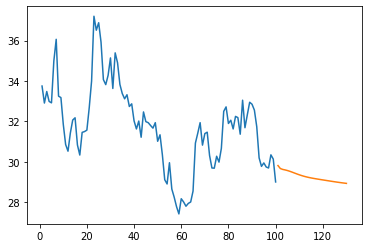

In [89]:
plt.plot(day_new,scalar.inverse_transform(df1[4823:]))
plt.plot(day_pred,scalar.inverse_transform(lst_outputs))